In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUI2016')

'/home/cusp/lag552/PUI2016'

In [3]:
!curl -O 'https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.0M  100 22.0M    0     0  14.3M      0  0:00:01  0:00:01 --:--:-- 15.8M


In [4]:
#!unzip 201512-citibike-tripdata.zip

In [5]:
citi_bike = pd.read_csv('201512-citibike-tripdata.csv')
citi_bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1


In [6]:
citi_bike.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'gender'], axis = 1, inplace = True)

In [7]:
citi_bike.head()

,birth year
0,1983.0
1,1975.0
2,1966.0
3,1985.0
4,1968.0


In [38]:
citi_bike_adj = citi_bike['birth year'] > 1920
citi_bike[citi_bike_adj].dropna().values

array([[ 1983.],
       [ 1975.],
       [ 1966.],
       ..., 
       [ 1959.],
       [ 1987.],
       [ 1968.]])

In [35]:
age_cb = (2016 - citi_bike[citi_bike_adj].dropna().values).flatten()
age_cb

array([ 33.,  41.,  50., ...,  57.,  29.,  48.])

In [20]:
mean_cb = np.mean(age_cb)
mean_cb

39.685962058736806

In [24]:
std_cb = np.std(age_cb)
std_cb, mean_cb

(11.71267746390131, 39.685962058736806)

In [25]:
import scipy.stats

In [44]:
scipy.stats.ks_2samp?


In [45]:
scipy.stats.kstest(age_cb, 'norm', args = (mean_cb, std_cb))

KstestResult(statistic=0.10015011582540717, pvalue=0.0)

(array([  8.10000000e+01,   2.41000000e+03,   2.79910000e+04,
          1.34022000e+05,   2.64350000e+05,   2.19842000e+05,
          7.57940000e+04,   1.07900000e+04,   6.31000000e+02,
          1.60000000e+01]),
 array([-14.70404545,  -3.33294444,   8.03815657,  19.40925758,
         30.78035859,  42.15145959,  53.5225606 ,  64.89366161,
         76.26476262,  87.63586363,  99.00696464]),
 <a list of 10 Patch objects>)

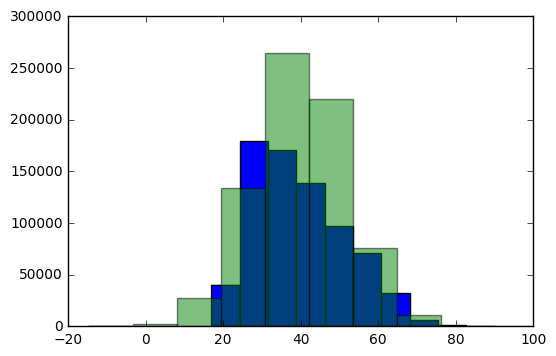

In [53]:
pl.hist(age_cb)
pl.hist(scipy.stats.norm.rvs(loc=mean_cb, scale=std_cb, size=len(age_cb)),alpha=0.5)

In [48]:
dir(scipy.stats)

['Tester',
 '__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betai',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisqprob',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'entropy',
 'erlang',
 'expon',
 'exponnorm',


In [50]:
scipy.stats.norm?

In [54]:
scipy.stats.kstest(age_cb, 'poisson', args = (mean_cb, std_cb))

KstestResult(statistic=0.55733038501297183, pvalue=0.0)

In [59]:
scipy.stats.poisson.rvs?

In [58]:
scipy.stats.norm.rvs?
#loc=0, scale=1, size=1, random_state=None

TypeError: _parse_args_rvs() got an unexpected keyword argument 'scale'

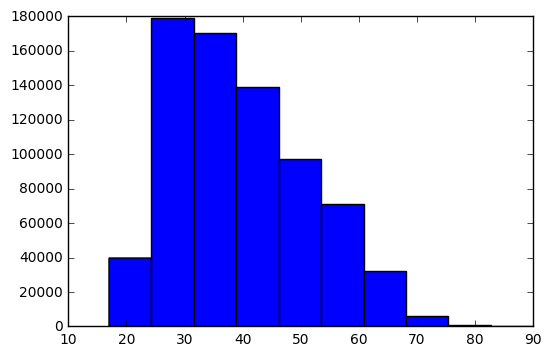

In [60]:
pl.hist(age_cb)
pl.hist(scipy.stats.poisson.rvs(loc=mean_cb, scale=std_cb, size=len(age_cb)),alpha=0.5)